<a href="https://colab.research.google.com/github/kenzou-eu/Asiatique/blob/main/EP_Num%C3%A9rico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Início do programa


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
pi = math.pi

In [2]:
def ck(a, b, k):
    dividend = a[k]
    divisor = math.sqrt(pow(a[k], 2) + pow(b[k], 2))
    c = dividend/divisor
    return c

def sk(a, b, k):
    dividend = -b[k]
    divisor = math.sqrt(pow(a[k], 2) + pow(b[k], 2))
    s = (dividend/divisor)
    return s

def sgn(d):
    if d >=0:
        return 1
    else:
        return -1

def dk(alfa, n): #alfa(i,k) é o coeficiente i da diagonal principal da matriz A na interação k, beta é da outra diagonal
    valuedk = (alfa[n-1] - alfa[n])/2
    return valuedk

def uk(alfa, beta, d, n, k, desloc): #Heurística de wilkinson
    if k!= 0 and desloc == 1:
      valueuk = alfa[n] + dk(alfa, n) - sgn(d)*(math.sqrt(pow(dk(alfa,n), 2) + pow(beta[n-1],2)))
      return valueuk
    if k==0 or desloc == 0:
      return 0

def matA(n): #A é a matriz da diagonal principal
    A = []
    for i in range(n):
        if i==0:
            a=float(input('Digite o primeiro elemento da diagonal principal:'))
            A.append(a)
        else:
            a=float(input('Digite o próximo elemento da diagonal principal:'))
            A.append(a)
    return A

def matB(n): #B é a matriz da sub-diagonal 
    B = []
    for i in range(n-1):
        if i==0:
            b=float(input('Digite o primeiro elemento da sub-diagonal: '))
            B.append(b)
        else:
            b=float(input('Digite o próximo elemento da sub-diagonal: '))
            B.append(b)
    return B

def v(n):
    v0=[]
    for i in range(n):
        v0.append(0)
    return(v0)

def handleV(n):
  V=[]
  for i in range(n):
      V.append(v(n))
  for i in range(n):
      V[i][i]=1
  return V



In [3]:
def metodoQR(n, A, B, V, erro, desloc):
    n0=n
    A0=[]
    B0=[]
    k = 0
    for i in range(n0-2,-1,-1):
        while abs(B[i]) > erro:
            cos = []
            sen = []
            C=[]
            for j in range(n-1):
                C.append(B[j])
            valueDK = dk(A, n-1)
            valueUK = uk(A, B, valueDK, n-1, k, desloc)
            for j in range(n):
                A[j] = A[j] - valueUK
            for q in range(n-1):
                if q != (n-2):
                    cos.append(ck(A,B,q))
                    sen.append(sk(A,B,q))
                    A.insert(q+1,(cos[q]*A[q]-sen[q]*B[q]))
                    A.pop(q)
                    A.insert(q+2,(sen[q]*C[q]+cos[q]*A[q+1]))
                    C.insert(q+1,(cos[q]*C[q]-sen[q]*A[q+1]))
                    A.pop(q+1)
                    C.pop(q)
                    C.insert(q+2,(cos[q]*C[q+1]))
                    C.pop(q+1)
                if q == (n-2):
                    cos.append(ck(A,B,q))
                    sen.append(sk(A,B,q)) 
                    A.insert(q+1,(cos[q]*A[q]-sen[q]*B[q]))
                    A.pop(q)
                    A.insert(q+2,(sen[q]*C[q]+cos[q]*A[q+1]))
                    C.insert(q+1,(cos[q]*C[q]-sen[q]*A[q+1]))
                    A.pop(q+1)
                    C.pop(q)
            for q in range(n-1):
                A.insert(q+1,(cos[q]*A[q]-sen[q]*C[q]))
                A.pop(q)
                A.insert(q+2,(cos[q]*A[q+1]))
                B.insert(q+1,(-sen[q]*A[q+1]))
                A.pop(q+1)
                B.pop(q)
                for m in range(n0):
                    V[m].insert(q+1,(cos[q]*V[m][q]-sen[q]*V[m][q+1]))
                    V[m].insert(q+3,(sen[q]*V[m][q]+cos[q]*V[m][q+2]))
                    V[m].pop(q)
                    V[m].pop(q+1)
            for j in range(n):
                A[j] = A[j] + valueUK
            k = k+1
        if i!=0:                    ##Processo de 
            A0.insert(0,A[n-1])      ## redução das matrizes
            B0.insert(0,B[n-2])
            A.pop(n-1)
            B.pop(n-2)
            n=n-1
        if i==0:
            A0.insert(0,A[n-1])
            A0.insert(0,A[n-2])
            B0.insert(0,B[n-2])
    A=A0
    B=B0
    return A, B, V, k

# **Teste A**

In [90]:
def ExA()
  desloc = int(input("Deseja realizar o QR com deslocamento? Se sim, digite 1, se não, digite 0. "))
  n = int(input("Qual a ordem da Matriz? ")) #tamanho da matriz
  # A = matA(n) #cria um vetor com os elementos da diagonal principal
  # B = matB(n) #cria um vetor com os elementos da sub-diagonal 
  # erro = float(input("Qual o valor do erro? Digite na forma 1.0e-6 "))

  A = []
  for i in range(n):
    A.append(2)
  B = []
  for i in range(n-1):
    B.append(-1)
  erro = float(1.0e-6)

  V = handleV(n)

  A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
  print('A =',A)
  print('V =')
  for i in range(n):
      print(V[i])
  print("O numero de interações foi: ", k)

ExA()

#Pegar o autovetor associado com o maior e menor autovalor e plotar ele


Deseja realizar o QR com deslocamento? Se sim, digite 1, se não, digite 0. 1
Qual a ordem da Matriz? 32
A = [3.9909438451461674, 3.9638573945254127, 3.918985947228993, 3.856735866032144, 3.777670897309847, 3.6825070656623606, 3.5721061894855732, 3.447468076210138, 3.3097214678905678, 3.160113819142354, 2.9999999999943037, 2.830830026009507, 2.654135926634842, 2.471517871018854, 2.28462967654657, 2.095163831647464, 1.9048361683489392, 1.7153703234570274, 1.5284821289811452, 1.345864073365156, 1.169169973996198, 0.9999999999951394, 0.8398861808624926, 0.6902785321094295, 0.5525319237898597, 0.42789381051442466, 0.3174929343376345, 0.22232910269006328, 0.14326413395848137, 0.08101405277970251, 0.009056154854600127, 0.036142605474586684]
V =
[0.023401180192361922, 0.04659043567964121, 0.06935776095031485, 0.09149697163381094, 0.11280757148887186, 0.13309656873018574, 0.15218022214611382, 0.1698857105399216, 0.18605267431525568, 0.2005348159466186, 0.21319941713109675, 0.2239370901206797, 0

In [ ]:
def autovalores(n):
  A = []
  for i in range(n):
    a = 2*(1-math.cos(((i+1)*pi)/(n+1)))
    A.insert(0,a)
  return A

def autovetores(n):
  V = []
  a = 0
  for i in range(n):
    vector = []
    for j in range(n):
      v = math.sin(((j+1)*(i+1)*pi)/(n+1))
      vector.insert(0, v)
      a = a + v**2
    normalized = vector/np.sqrt(a)
    a = 0
    V.append(normalized)
  return V


n = int(input("Qual a ordem da Matriz? ")) #tamanho da matriz
Vteorico = autovetores(n)
Ateorico = autovalores(n)
print("O A teórico é: ", Ateorico)
display("O V teórico é: ", Vteorico)

Qual a ordem da Matriz? 4
O A teórico é:  [3.618033988749895, 2.618033988749895, 1.381966011250105, 0.3819660112501051]


'O V teórico é: '

[array([0.37174803, 0.60150096, 0.60150096, 0.37174803]),
 array([-0.60150096, -0.37174803,  0.37174803,  0.60150096]),
 array([ 0.60150096, -0.37174803, -0.37174803,  0.60150096]),
 array([-0.37174803,  0.60150096, -0.60150096,  0.37174803])]

# **Exercício B**

Qual teste você deseja rodar? 1: X(0) = [-2, -3, -3, -3, -1], 2: X(0) = [1, 10, -4, 3, -2], 3: X(0) = modo de maior frequência 3
Você escolheu o teste com X(0) = modo de maior frequência
O X(0) é:  [0.1893346573107501, 0.47497610428602555, 0.5988223982052636, 0.5325039524890145, 0.31048569031368434]
A frequência com valor:  
9.404520488593056
Tem os modos de vibração: 
[0.1893346573107501, 0.47497610428602555, 0.5988223982052636, 0.5325039524890145, 0.31048569031368434]

A frequência com valor:  
8.373400213205445
Tem os modos de vibração: 
[-0.3911052075280567, -0.585382812847187, -0.10270311331950038, 0.4744456963356219, 0.5183792345480663]

A frequência com valor:  
6.839092508517442
Tem os modos de vibração: 
[0.5576611077554171, 0.18485786148930244, -0.5648687392563424, -0.0637570182596996, 0.5759340326601521]

A frequência com valor:  
4.837213366656602
Tem os modos de vibração: 
[-0.5882019988349073, 0.38295963757809504, 0.09308548584215634, -0.5173751580266018, 0.48064369623989

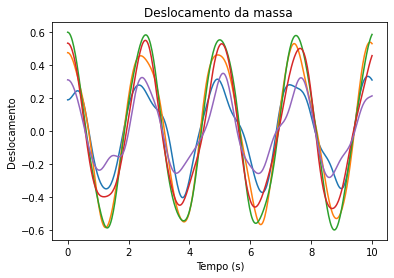

In [100]:
# Autovetores representam os modos naturais de vibração
# Autovalores determinam as frequências

def k(i):
    ki = (40 + 2*i)
    return ki

def mainDiag(n,m):
    A=[]
    for i in range(1,n+1):
        a = (k(i) + k(i+1))/m
        A.append(a)
    return A

def subDiag(n,m):
    B = []
    for i in range(2,n+1):
        b = -k(i)/m
        B.append(b)
    return B

# def handle_a(x0, n): #Dado que a velocidade inicial é sempre nula b é sempre zero e a tem o mesmo valor que x0
#     mat_a=[]
#     for i in range(n):
#         value = x0[i]
#         mat_a.append(value)
#     return mat_a

def handley0(x0, V):
    Vt = np.transpose(V)
    y0 = np.dot(Vt, x0)
    return y0

def functionY(t, a, n, A, Y):
  Y = []
  for i in range(n):
    y = a[i]*math.cos(math.sqrt(A[i])*t)
    Y.append(y)
  return Y

def functionX(t, a, n, j, A, V, Y):
    Y = functionY(t, a, n, A, Y)
    X = np.dot(V[j], Y)
    return X
  
def plotGraphs(t, value_a, n, A, V, x0):
  eixo_x = np.arange(0, 10.025, 0.025)
  # eixo_y = []
  # for i in range(t+1):
  #   eixo_y.append(i)

  for j in range(n):
    eixo_y = []
    eixo_y.append(x0[j])
    Y =[]
    for i in range(1, len(eixo_x)):
      xi = functionX(eixo_x[i], value_a, n, j, A, V, Y) 
      eixo_y.append(xi)
    plt.plot(eixo_x, eixo_y)
    title = "Deslocamento da massa " #+ str(j+1)
    plt.title(title)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Deslocamento')
    # plt.show()
    print("A frequência com valor:  ")
    print(np.sqrt(A[j]))
    print("Tem os modos de vibração: ")
    print(V[j])
    print("")

def testeB1(n, t, A, V):
  x0 = [-2, -3, -1, -3, -1]
  # print("A", A)
  # print("V", V)
  y0 = handley0(x0, V)
  value_a = y0.copy()
  plotGraphs(t, value_a, n, A, V, x0) 

def testeB2(n, t, A, V):
  x0 = [1, 10, -4, 3, -2]
  # print("A", A)
  # print("V", V)
  y0 = handley0(x0, V)
  value_a = y0.copy()
  plotGraphs(t, value_a, n, A, V, x0)

def testeB3(n, t, A, V):
  index = np.argmax(A)
  x0 = V[index]
  print("O X(0) é: ", x0)
  y0 = handley0(x0, V)
  value_a = y0.copy()
  plotGraphs(t, value_a, n, A, V, x0)

def ExB():
  n = 5 #Quantidade de massas
  m = 2 #Massa das massas
  desloc = 1
  t = 10 #tempo em segundos
  erro = 1.0e-6
  V = handleV(n)
  A = mainDiag(n,m)
  B = subDiag(n,m)
  A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
  teste = int(input("Qual teste você deseja rodar? 1: X(0) = [-2, -3, -3, -3, -1], 2: X(0) = [1, 10, -4, 3, -2], 3: X(0) = modo de maior frequência "))
  if teste == 1:
    print("Você escolheu o teste com X(0) = [-2, -3, -3, -3, -1]")
    testeB1(n, t, A, V)
  elif teste == 2:
    print("Você escolheu o teste com X(0) = [1, 10, -4, 3, -2]")
    testeB2(n, t, A, V)
  elif teste == 3:
    print("Você escolheu o teste com X(0) = modo de maior frequência")
    testeB3(n, t, A, V)
  else:
    print("Esse valor de teste não é válido, tente novamente: ")
    ExB()
  

ExB()
  



# **Teste C**

Qual teste você deseja rodar? 1: X(0) = [-2, -3, -3, -3, -1], 2: X(0) = [1, 10, -4, 3, -2], 3: X(0) = modo de maior frequência 2
Você escolheu o teste com X(0) = [1, 10, -4, 3, -2]












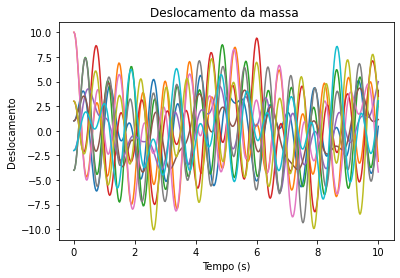

In [91]:

def kC(i):
    ki = (40 + 2*pow(-1,1))
    return ki

def mainDiagC(n,m):
    A=[]
    for i in range(1,n+1):
        a = (kC(i) + kC(i+1))/m
        A.append(a)
    return A

def subDiagC(n,m):
    B = []
    for i in range(2,n+1):
        b = -kC(i)/m
        B.append(b)
    return B

def handleX0(x0):
  for i in range(len(x0)):
    x0.append(x0[i])
  return x0


def testeC1(n, t, A, V):
  x0 = [-2, -3, -1, -3, -1]
  newx0 = handleX0(x0)
  # print("A", A)
  # print("V", V)
  y0 = handley0(newx0, V)
  value_a = y0.copy()
  plotGraphs(t, value_a, n, A, V, newx0) 

def testeC2(n, t, A, V):
  x0 = [1, 10, -4, 3, -2]
  newx0 = handleX0(x0)
  # print("A", A)
  # print("V", V)
  y0 = handley0(newx0, V)
  value_a = y0.copy()
  plotGraphs(t, value_a, n, A, V, newx0)

def testeC3(n, t, A, V):
  index = np.argmax(A)
  x0 = V[index]
  print("O X(0) é: ", x0)
  # newx0 = handleX0(x0)
  y0 = handley0(x0, V)
  value_a = y0.copy()
  plotGraphs(t, value_a, n, A, V, x0)


def ExC():
  n = 10 #Quantidade de massas
  m = 2 #Massa das massas
  desloc = 1
  t = 10 #tempo em segundos
  erro = 1.0e-6
  V = handleV(n)
  A = mainDiagC(n,m)
  B = subDiagC(n,m)
  A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
  teste = int(input("Qual teste você deseja rodar? 1: X(0) = [-2, -3, -3, -3, -1], 2: X(0) = [1, 10, -4, 3, -2], 3: X(0) = modo de maior frequência "))
  if teste == 1:
    print("Você escolheu o teste com X(0) = [-2, -3, -3, -3, -1]")
    testeC1(n, t, A, V)
  elif teste == 2:
    print("Você escolheu o teste com X(0) = [1, 10, -4, 3, -2]")
    testeC2(n, t, A, V)
  elif teste == 3:
    print("Você escolheu o teste com X(0) = modo de maior frequência")
    testeC3(n, t, A, V)
  else:
    print("Esse valor de teste não é válido, tente novamente: ")
    ExC()
  

ExC()

# **New Section**

In [ ]:
ex = int(input("Qual exercício deseja fazer (A, B ou C)? "))

if teste == 1:
    print("Você escolheu o teste com X(0) = [-2, -3, -3, -3, -1]")
    testeC1(n, t, A, V)
  elif teste == 2:
    print("Você escolheu o teste com X(0) = [1, 10, -4, 3, -2]")
    testeC2(n, t, A, V)
  elif teste == 3:
    print("Você escolheu o teste com X(0) = modo de maior frequência")
    testeC3(n, t, A, V)
  else:
    print("Esse valor de teste não é válido, tente novamente: ")
    ExC()